In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
def hypotesis_check(p_value):
    alpha=0.05
    # Decisión en función del p-valor y el nivel de significación
    if p_value < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

In [3]:
data = pd.read_csv('bases Hycosi sofia.xlsx - Hoja3.csv')
data.head()

,Edad,Volumen contraste,Posición uterina,Dia del ciclo,Permeabilidad tubaria,Patologia en cavidad,Tiempo esterilidad (meses),Paridad,EVA
0,36,4,anteflexión,11,2,no,24.0,0,5
1,33,10,anteflexión,8,2,no,42.0,G1P1,1
2,36,5,anteflexión,7,2,no,24.0,0,2
3,34,10,anteflexión,7,2,no,11.0,0,5
4,32,10,anteflexión,8,2,si,36.0,0,3


Es un dataframe de un estudio clinico en reproduccion humana, adonde se valora la performance en terminos de una escala de dolor (EVA) de una técnica diagnóstica de patologia intrauterina y tubarica por ecografía transvaginal, utilizando un medio de contraste ultrasonografico. 

Las variables que tenemos son: 
 - Edad
 - Volumen contraste: La cantidad de contraste instilado en centimetros cubicos.
 - Posición uterina: Posicion del útero en la pelvis: Anteflexion (hacia adelante, mas comun), retroflexion (hacia atras, menos comun)
 - Permeabilidad tubaria: Categorizacion, si las dos trompas demostraron pasaje de contraste, o si solo la derecha o la izquierda. 
 - Patología en cavidad: Si o no, no clasifica.
 - Teimpo esterilidad (meses): Las que no tienen tiempo de esterilidad son madres solteras o parejas femeninas.
 - Paridad: G son embarazos previos, P partos vaginals, C cesareas, A abortos, EE embarazos ectopicos. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        46 non-null     int64  
 1   Volumen contraste           46 non-null     int64  
 2   Posición uterina            46 non-null     object 
 3   Dia del ciclo               46 non-null     int64  
 4   Permeabilidad tubaria       46 non-null     object 
 5   Patologia en cavidad        46 non-null     object 
 6   Tiempo esterilidad (meses)  40 non-null     float64
 7   Paridad                     46 non-null     object 
 8   EVA                         46 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 3.4+ KB


In [5]:
data.describe(include = 'all')

,Edad,Volumen contraste,Posición uterina,Dia del ciclo,Permeabilidad tubaria,Patologia en cavidad,Tiempo esterilidad (meses),Paridad,EVA
count,46.000000,46.000000,46,46.000000,46,46,40.000000,46,46.000000
unique,NaN,NaN,3,NaN,4,2,NaN,5,NaN
top,NaN,NaN,anteflexión,NaN,2,no,NaN,0,NaN
freq,NaN,NaN,39,NaN,42,36,NaN,39,NaN
mean,33.326087,6.565217,NaN,8.869565,NaN,NaN,19.050000,NaN,2.065217
std,2.805188,2.696930,NaN,1.359881,NaN,NaN,10.015245,NaN,1.691839
min,26.000000,2.000000,NaN,7.000000,NaN,NaN,8.000000,NaN,0.000000
25%,32.000000,5.000000,NaN,8.000000,NaN,NaN,12.000000,NaN,1.000000
50%,33.000000,6.000000,NaN,9.000000,NaN,NaN,17.500000,NaN,2.000000
75%,35.750000,10.000000,NaN,10.000000,NaN,NaN,24.000000,NaN,3.000000


In [6]:
data.describe()

,Edad,Volumen contraste,Dia del ciclo,Tiempo esterilidad (meses),EVA
count,46.000000,46.000000,46.000000,40.000000,46.000000
mean,33.326087,6.565217,8.869565,19.050000,2.065217
std,2.805188,2.696930,1.359881,10.015245,1.691839
min,26.000000,2.000000,7.000000,8.000000,0.000000
25%,32.000000,5.000000,8.000000,12.000000,1.000000
50%,33.000000,6.000000,9.000000,17.500000,2.000000
75%,35.750000,10.000000,10.000000,24.000000,3.000000
max,38.000000,10.000000,12.000000,60.000000,7.000000


## Análisis univariante

### **Edad**
- Tipo de variable: Cuantitativa discreta
- Dtype: Integer
- Distribución: Normal

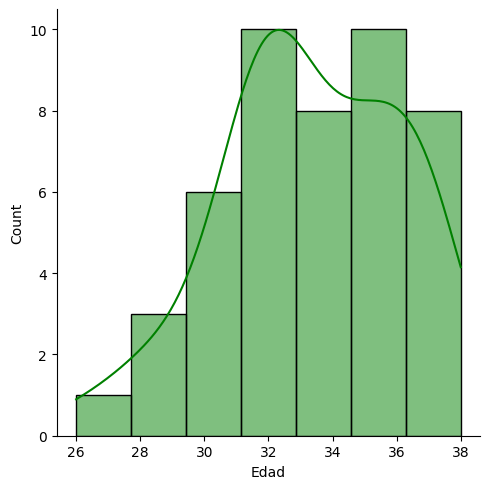

In [7]:
sns.displot(data['Edad'], kde = True, color = 'green')

In [8]:
import scipy.stats as stats

edad = data['Edad']

stat, p = stats.shapiro(edad)

print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')


Shapiro-Wilk:
Statistic : 0.9538, p-value :   0.065657


In [9]:
hypotesis_check(p)

No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal


<AxesSubplot:xlabel='Edad'>

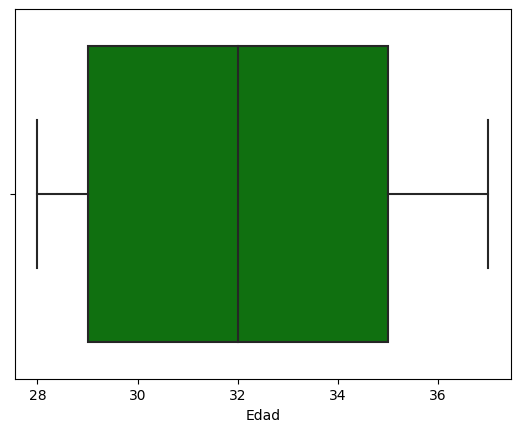

In [10]:
sns.boxplot(edad, x=data['Edad'], color = 'green')

### **Volumen contraste**
- Tipo de variable: Cuantitativa continua
- Dtype: Integer
- Distribución: Anormal

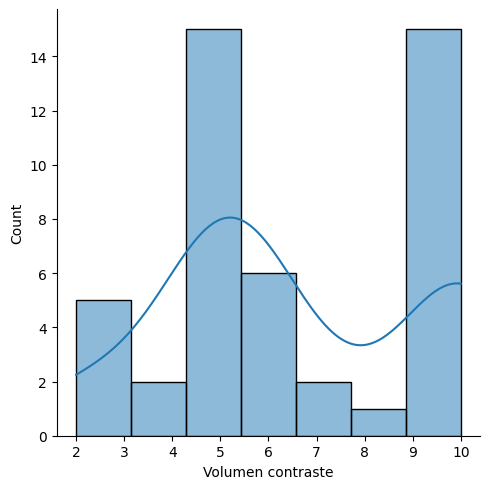

In [11]:
contraste = data['Volumen contraste']
sns.displot(contraste, kde = True)

<AxesSubplot:xlabel='Volumen contraste'>

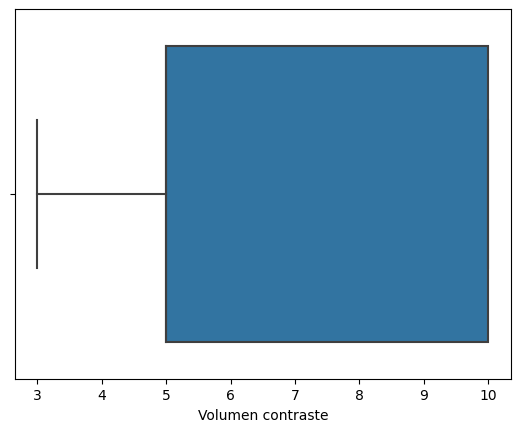

In [12]:

sns.boxplot(contraste, x=data['Volumen contraste'])

In [13]:
stat, p = stats.shapiro(contraste)

print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')

Shapiro-Wilk:
Statistic : 0.8469, p-value :   0.000026


In [14]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


### **Posición uterina**
-   Tipo de variable: Cualitativa nominal
-   Dtype: Object
-   Distribucion: Anormal.
  

In [15]:
data['Posición uterina'].value_counts()

anteflexión     39
retroflexión     5
antefelxión      2
Name: Posición uterina, dtype: int64

##### Corrección de errores de tipeo

In [16]:
data['Posición uterina'].replace('antefelxión', 'anteflexión', inplace=True)

In [17]:
frec_pos = data['Posición uterina'].value_counts()
frec_pos

anteflexión     41
retroflexión     5
Name: Posición uterina, dtype: int64

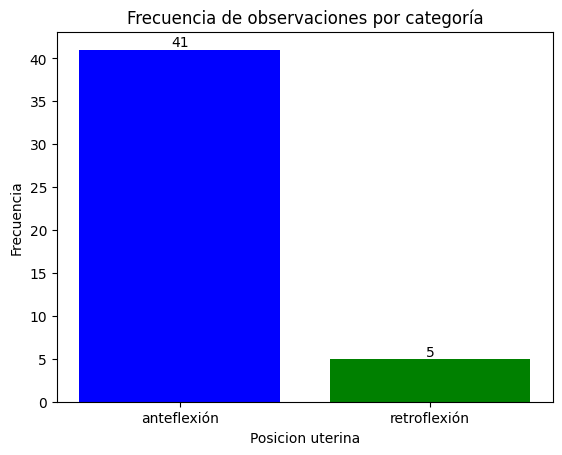

In [18]:
colores = ['blue', 'green']
plt.bar(frec_pos.index, frec_pos.values, color=colores)
plt.xlabel('Posicion uterina')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de observaciones por categoría')

for i, v in enumerate(frec_pos.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()

### **Dia del ciclo**
-   Tipo de variable: Cuantitativa discreta
-   Dtype: Integer
-   Distribución: Anormal

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Dia del ciclo', ylabel='Density'>

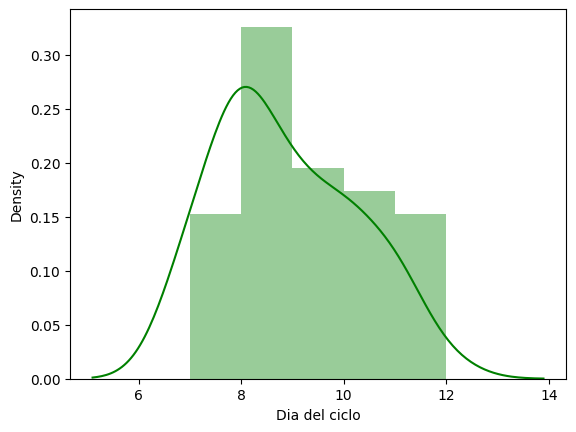

In [19]:
dia_ciclo = data['Dia del ciclo']

sns.distplot(dia_ciclo, kde = True, color = 'green')

<AxesSubplot:xlabel='Dia del ciclo'>

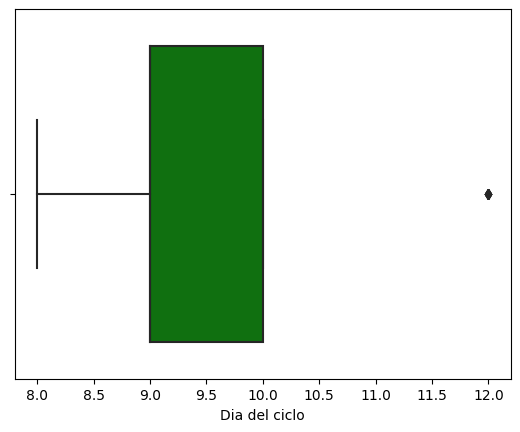

In [20]:

sns.boxplot(dia_ciclo, x=data['Dia del ciclo'], color = 'green')

In [21]:
stat, p = stats.shapiro(data['Dia del ciclo'])

print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')

Shapiro-Wilk:
Statistic : 0.9107, p-value :   0.001830


In [22]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


### **Permeabilidad tubaria**
-   Tipo de variable: Categórica
-   Dtype: Object
-   Distribución: Anormal

In [23]:
data['Permeabilidad tubaria'].value_counts()

2                                             42
Unilateral (derecha)                           2
Permeabilidad tubárica unilateral derecha.     1
1(derecha)                                     1
Name: Permeabilidad tubaria, dtype: int64

#### Corrección de categorias en los valores. 
2 = permeabilidad bilateral, 1 = Permeabilidad unilateral, 0 = No permeablidad

In [24]:
mask = data['Permeabilidad tubaria'] != '2'
data.loc[mask, 'Permeabilidad tubaria'] = '1'

In [25]:
frec_perm = data['Permeabilidad tubaria'].value_counts()
frec_perm

2    42
1     4
Name: Permeabilidad tubaria, dtype: int64

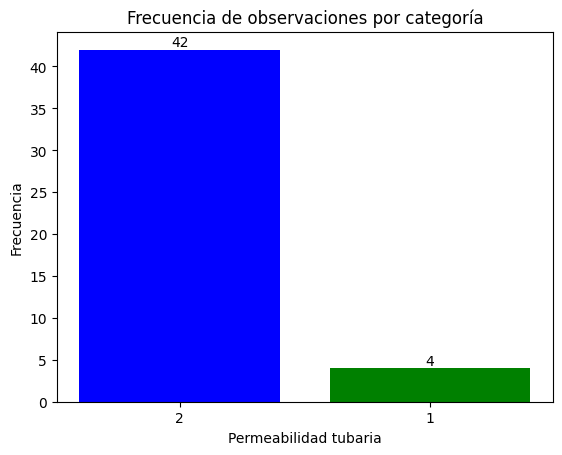

In [26]:
plt.bar(frec_perm.index, frec_perm.values, color=colores)
plt.xlabel('Permeabilidad tubaria')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de observaciones por categoría')

for i, v in enumerate(frec_perm.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()

### **Patologia en cavidad**
-   Tipo de variable: Categórica nominal.
-   Dtype: Object
-   Distribución: Anormal


In [27]:
frec_patologia = data['Patologia en cavidad'].value_counts()
frec_patologia

no    36
si    10
Name: Patologia en cavidad, dtype: int64

In [28]:
colores = ['blue', 'green']

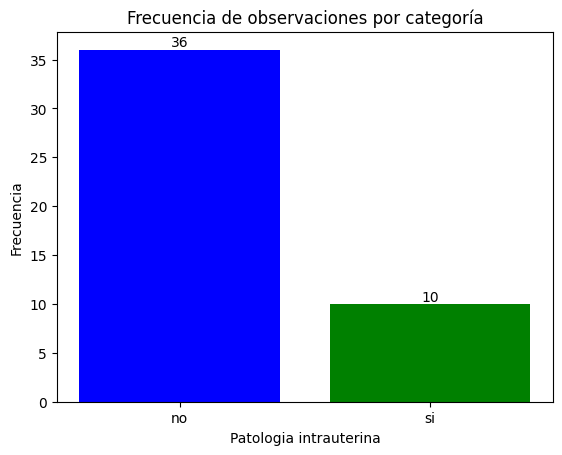

In [29]:
plt.bar(frec_patologia.index, frec_patologia.values, color=colores)
plt.xlabel('Patologia intrauterina')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de observaciones por categoría')

for i, v in enumerate(frec_patologia.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()

### **Tiempo esterilidad (meses)**
-   Tipo de variable: Cuantitativa discreta
-   Dtype: Float
-   Distribución: Anormal
-   Missings: 6

In [30]:
data['Tiempo esterilidad (meses)'].dtypes

dtype('float64')

In [31]:
data['Tiempo esterilidad (meses)'].isna().sum()

6

In [32]:
tiempo_esterilidad = data['Tiempo esterilidad (meses)'].dropna()

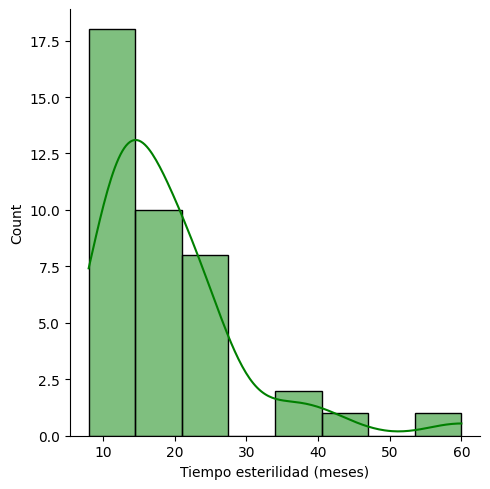

In [33]:
sns.displot(tiempo_esterilidad, kde = True, color = 'green')

In [34]:
stat, p = stats.shapiro(tiempo_esterilidad)

print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p:5f}')

Shapiro-Wilk:
Statistic : 0.7504, p-value : 0.000001


In [35]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


### **Paridad**
- Tipo de Variable: Categorica nominal
- Dtype: Object
- Distribucion: Anormal

In [36]:
data['Paridad'].value_counts()

0             39
G1A1           3
G1P1           2
G3 A2  P1      1
G2A2           1
Name: Paridad, dtype: int64

En esta variable hay que hacer feauture engineering, extrayendo la sigla de las letras y poniendola en nuevas columnas, y asignarle el numero acompañante como valor de la observacion correspondiente

In [37]:
import re

# Extrae las letras "G", "P" y "A" de la columna 'Paridad' utilizando expresiones regulares
data['Letra_G'] = data['Paridad'].str.extract(r'(G\d+)')
data['Letra_P'] = data['Paridad'].str.extract(r'(P\d+)')
data['Letra_A'] = data['Paridad'].str.extract(r'(A\d+)')

# Extrae los valores numéricos correspondientes
data['Letra_G'] = data['Letra_G'].str.extract(r'(\d+)')
data['Letra_P'] = data['Letra_P'].str.extract(r'(\d+)')
data['Letra_A'] = data['Letra_A'].str.extract(r'(\d+)')

# Convierte las columnas a tipo numérico
data['Letra_G'] = pd.to_numeric(data['Letra_G'])
data['Letra_P'] = pd.to_numeric(data['Letra_P'])
data['Letra_A'] = pd.to_numeric(data['Letra_A'])

# Elimina la columna 'Paridad'
data = data.drop('Paridad', axis=1)

#Renombramos las columnas letras:
data = data.rename(columns={'Letra_G': 'G', 'Letra_P': 'P', 'Letra_A': 'A'})

data['G'].fillna(0, inplace=True)
data['P'].fillna(0, inplace=True)
data['A'].fillna(0, inplace=True)

data['G'] = data['G'].astype(int)
data['P'] = data['P'].astype(int)
data['A'] = data['A'].astype(int)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        46 non-null     int64  
 1   Volumen contraste           46 non-null     int64  
 2   Posición uterina            46 non-null     object 
 3   Dia del ciclo               46 non-null     int64  
 4   Permeabilidad tubaria       46 non-null     object 
 5   Patologia en cavidad        46 non-null     object 
 6   Tiempo esterilidad (meses)  40 non-null     float64
 7   EVA                         46 non-null     int64  
 8   G                           46 non-null     int32  
 9   P                           46 non-null     int32  
 10  A                           46 non-null     int32  
dtypes: float64(1), int32(3), int64(4), object(3)
memory usage: 3.5+ KB


### **EVA**
-   Tipo de variable: Cuantitativa discreta
-   Dtype: Integer
-   Distribución: Anormal

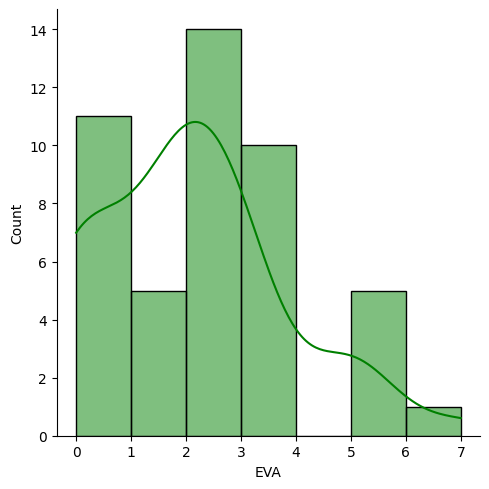

In [38]:
eva = data['EVA']
sns.displot(eva, kde = True, color = 'green')

In [39]:
stat, p = stats.shapiro(eva)

print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p:5f}')

Shapiro-Wilk:
Statistic : 0.8926, p-value : 0.000487


In [40]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


## Análisis multivariante
Matriz de correlación

In [41]:
data.corr(method='pearson')

,Edad,Volumen contraste,Dia del ciclo,Tiempo esterilidad (meses),EVA,G,P,A
Edad,1.000000,-0.124774,0.104604,0.043163,-0.070134,-0.150424,0.000690,-0.190223
Volumen contraste,-0.124774,1.000000,-0.070340,0.146042,0.337535,0.018727,0.175081,-0.069384
Dia del ciclo,0.104604,-0.070340,1.000000,-0.163861,0.158322,-0.019169,0.091075,-0.072582
Tiempo esterilidad (meses),0.043163,0.146042,-0.163861,1.000000,-0.078897,0.105563,0.323619,-0.012018
EVA,-0.070134,0.337535,0.158322,-0.078897,1.000000,-0.080891,-0.115527,-0.040717
G,-0.150424,0.018727,-0.019169,0.105563,-0.080891,1.000000,0.652634,0.915398
P,0.000690,0.175081,0.091075,0.323619,-0.115527,0.652634,1.000000,0.292419
A,-0.190223,-0.069384,-0.072582,-0.012018,-0.040717,0.915398,0.292419,1.000000


In [42]:
spearmancorr = data.corr(method='spearman')

<AxesSubplot:>

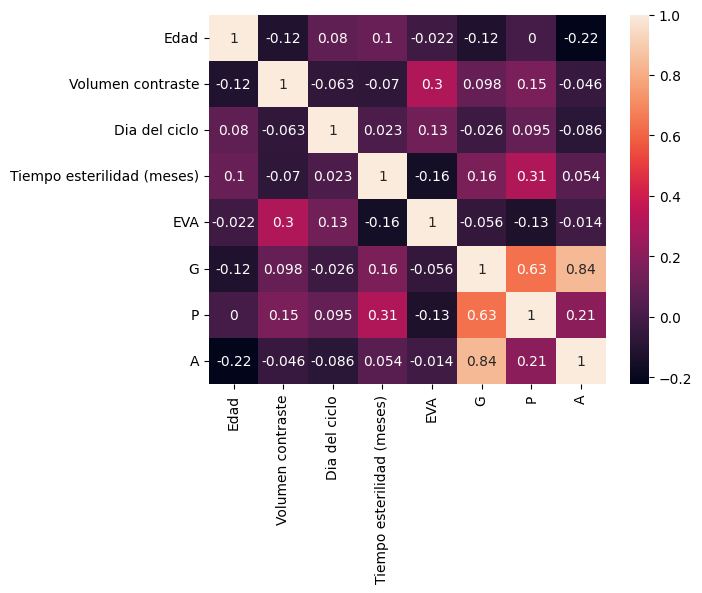

In [43]:
sns.heatmap(spearmancorr, annot=True)

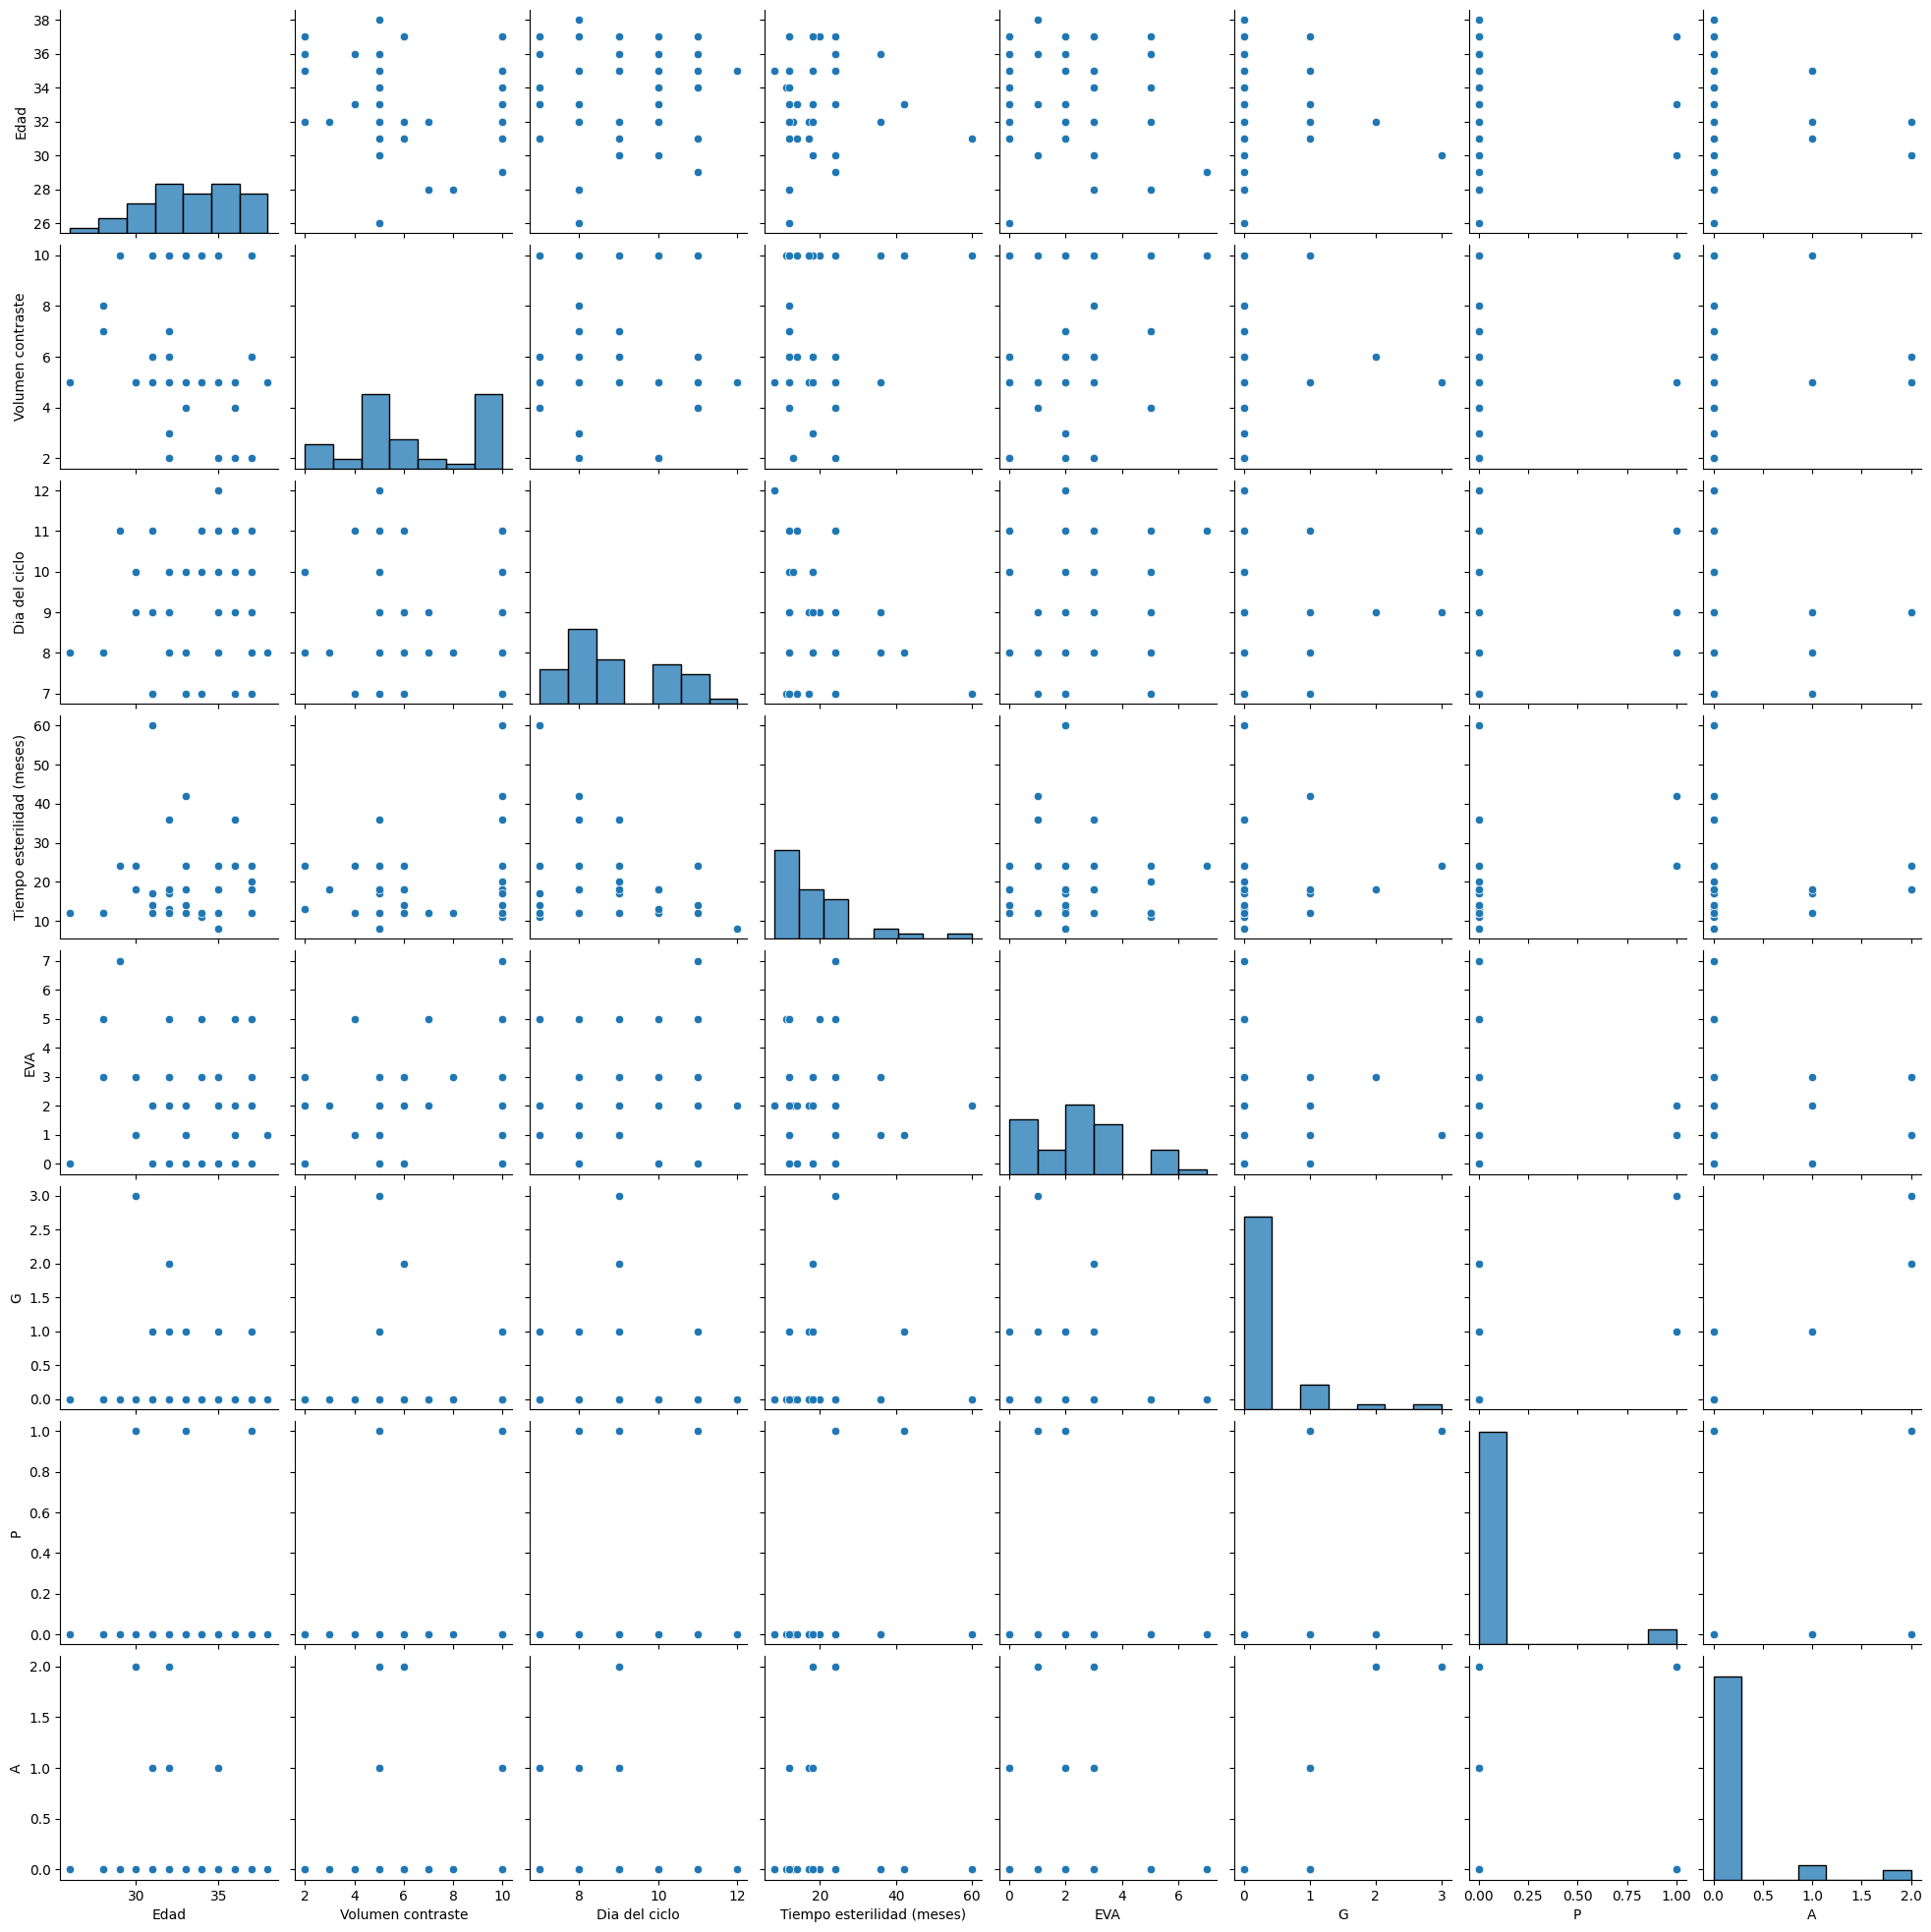

In [44]:
sns.pairplot(data)

<AxesSubplot:>

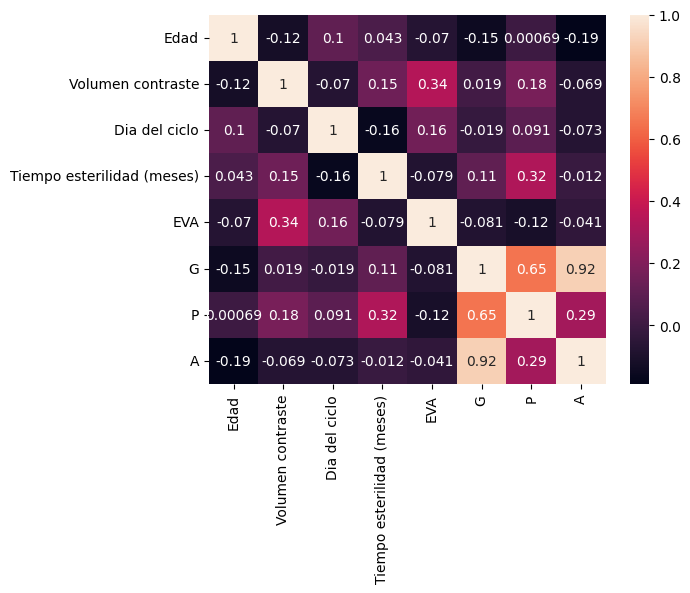

In [45]:
sns.heatmap(data.corr(), annot=True)

## Planteo de hipótesis:

1. ¿A más edad de las pacientes se necesita más necesidad de  contraste?

1. ¿A mayor tiempo de de esterilidad más mL de contraste para ver la permeabilidad?

1. ¿Más contraste en pacientes con patología uterina?

1. ¿Más contraste en úteros en retroflexión comparado con aneteflexion?

1. ¿Se necesita más cantidad de contraste según que etapa del ciclo? ( creo que se podría hacer dos gruos entre el día 7-9 y del día 10-12)

1. ¿Mayor dolor según momento del ciclo? ( Realizar dos grupos entre el día 7-9 y del día 10-12) 

1. ¿La edad media en las obstrucciones unilaterales fue mayor estadísticamente significativo que en el grupo de permeabilidad bilateral?

1. ¿Menor dolor percibido (EVA) en pacientes que han gestado ( contando aborto y embarazos normales) comparado con aquellas nuligestas?

1. ¿Los valores EVA son mayores cuanto mayor es el volumende contraste utilizado?


#### **1. ¿Se necesita más contraste cuanto mayor es la edad de la paciente?**

Volumen contraste: Cuantitativa continua

Edad: Cuantitativa discreta

Test de correlacion: Spearman

- H0: No hay correlación entre cantidad de contraste y edad de la paciente
- H1: Existe correlación entre cantidad de contraste y edad de la paciente.

<AxesSubplot:xlabel='Edad', ylabel='Volumen contraste'>

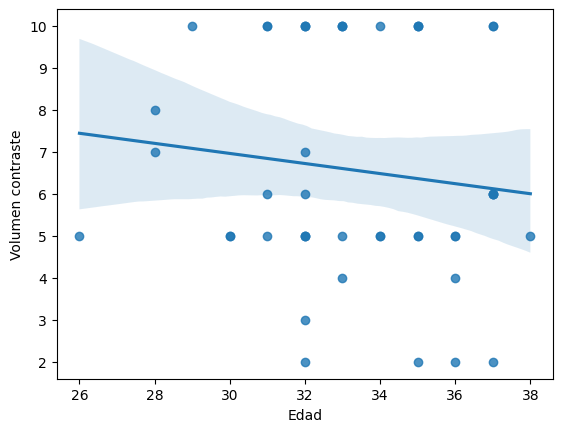

In [46]:
sns.regplot(data = data, x = data['Edad'],  y = data['Volumen contraste'])

In [47]:
stats.spearmanr(data['Edad'], data['Volumen contraste'])

SpearmanrResult(correlation=-0.11541600348320703, pvalue=0.4449837952644031)

In [48]:
stat, p = stats.spearmanr(data['Edad'], data['Volumen contraste'])

print('Spearman:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')

Spearman:
Statistic : -0.1154, p-value :   0.444984


In [49]:
print('Hipótesis 1:')
if p < 0.05:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')

Hipótesis 1:
No se rechaza la hipotesis nula


#### **2. ¿A mayor tiempo de de esterilidad más cantidad de contraste?**

Volumen contraste: Cuantitativa continua

Tiempo esterilidad (meses): Cuantitativa discreta

Test de correlación: Spearman

- H0: No hay correlación entre cantidad de contraste y meses de esterilidad.
- H1: Existe correlación entre cantidad de contraste y meses de esterilidad.

<AxesSubplot:xlabel='Tiempo esterilidad (meses)', ylabel='Volumen contraste'>

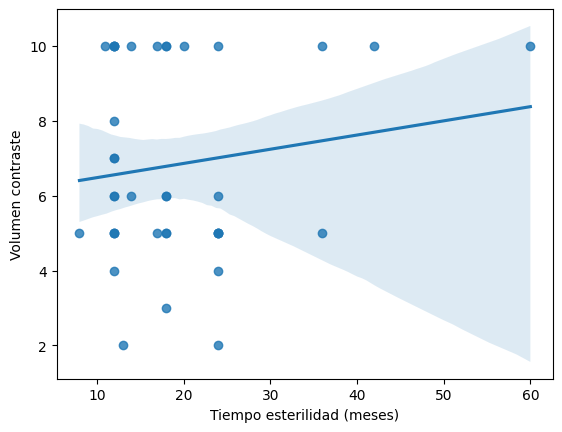

In [50]:
sns.regplot(data = data, x = data['Tiempo esterilidad (meses)'],  y = data['Volumen contraste'])

In [51]:
tiempo_volumen = data.loc[:, ['Tiempo esterilidad (meses)', 'Volumen contraste']]
tiempo_volumen.dropna(inplace=True)
tiempo_volumen.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 43
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tiempo esterilidad (meses)  40 non-null     float64
 1   Volumen contraste           40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes


In [52]:
stat, p = stats.spearmanr(tiempo_volumen['Tiempo esterilidad (meses)'], tiempo_volumen['Volumen contraste'])

print('Spearman:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')

Spearman:
Statistic : -0.0701, p-value :   0.667382


In [53]:
print('Hipótesis 2:')
if p < 0.05:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')

Hipótesis 2:
No se rechaza la hipotesis nula


#### **3. ¿Se utiliza más contraste en pacientes con patología uterina?**

Volumen contraste: Cuantitativa continua.

Patología en cavidad: Categórica nominal.

Prueba U de Mann-Whitney. Compara la mediana de dos grupos.

- H0: No hay correlación entre cantidad de contraste y la presencia de patología uterina.
- H1: Existe correlación entre cantidad de contraste y la presencia de patología uterina.

In [54]:
contraste_patologia = data.loc[:, ['Patologia en cavidad', 'Volumen contraste']]
group_patologia = contraste_patologia.loc[data['Patologia en cavidad'] == 'si']['Volumen contraste']
group_no_patologia = contraste_patologia.loc[data['Patologia en cavidad'] == 'no']['Volumen contraste']

In [55]:
print(group_patologia.value_counts())
print(group_no_patologia.value_counts())

10    6
5     3
6     1
Name: Volumen contraste, dtype: int64
5     12
10     9
6      5
2      4
4      2
7      2
3      1
8      1
Name: Volumen contraste, dtype: int64


In [56]:
U, p = stats.mannwhitneyu(group_patologia, group_no_patologia)

print('Mann-Whitney:')
print(f'Statistic : {U:.4f}, p-value : {p:10f}')

Mann-Whitney:
Statistic : 249.5000, p-value :   0.056459


In [57]:
print('Hipótesis 3:')
if p < 0.05:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')

Hipótesis 3:
No se rechaza la hipotesis nula


#### **4.¿Se utiliza más contraste en úteros en retroflexión comparado con anteflexión?**

Volumen contraste: Cuantitativa continua.

Posisión uterina: Categórica nominal.

Prueba U de Mann-Whitney. Compara la mediana de dos grupos.

- H0: No hay diferencia en la mediana de la cantidad de contraste según la posición uterina.
- H1: Existe diferencia en la mediana de la cantidad de contraste según la posición uterina.

In [58]:
U, p = stats.mannwhitneyu(data['Volumen contraste'][data['Posición uterina'] == 'anteflexión'],
                          data['Volumen contraste'][data['Posición uterina'] == 'retroflexión'])

print('Mann-Whitney:')
print(f'Statistic : {U:.4f}, p-value : {p:10f}')

Mann-Whitney:
Statistic : 134.5000, p-value :   0.248513


In [59]:
print('Hipótesis 4:')
if p < 0.05:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

Hipótesis 4:
No se rechaza la hipótesis nula


#### **5.¿Se necesita más cantidad de contraste según que etapa del ciclo?**

Volumen contraste: Cuantitativa continua.

Dia del ciclo: Cuantitativa discreta.

Test de correlacion: Spearman

- H0: No hay correlació entre cantidad de contraste y dia del ciclo.
- H1: Existe correlación entre cantidad de contraste y dia del ciclo.

<AxesSubplot:xlabel='Dia del ciclo', ylabel='Volumen contraste'>

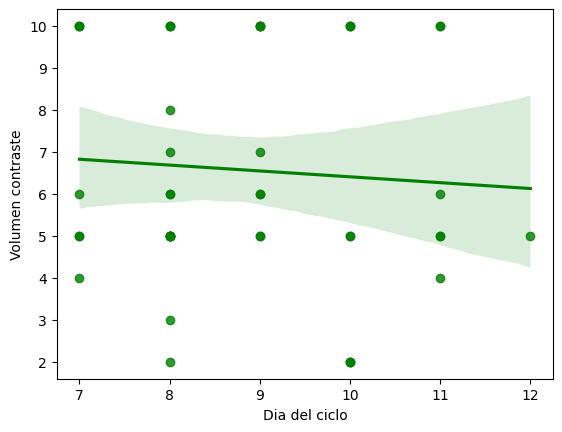

In [60]:
sns.regplot(data = data, x = data['Dia del ciclo'],  y = data['Volumen contraste'], color = 'green')

In [61]:
stat,p = stats.spearmanr(data['Dia del ciclo'], data['Volumen contraste'])

print('Spearman:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')

Spearman:
Statistic : -0.0628, p-value :   0.678505


In [62]:
print('Hipótesis 5:')
if p < 0.05:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')


Hipótesis 5:
No se rechaza la hipotesis nula


#### **6. ¿Es mayor el dolor segun el dia del ciclo?**

EVA: Cuantitativa discreta.

Dia del ciclo: Cuantitativa discreta.

Test de correlacion: Spearman

- H0: No hay correlació entre el score EVA y dia del ciclo.
- H1: Existe correlación entre cel score EVA y dia del ciclo.

<AxesSubplot:xlabel='EVA', ylabel='Dia del ciclo'>

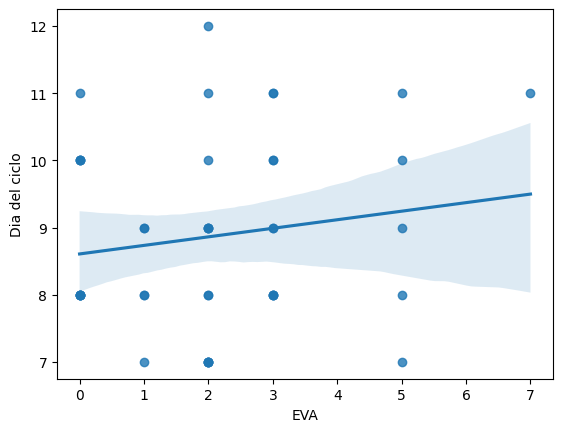

In [63]:
sns.regplot(data = data, x = data['EVA'],  y = data['Dia del ciclo'])

In [64]:
stat,p = stats.spearmanr(data['EVA'], data['Dia del ciclo'])

print('Spearman:')
print(f'Statistic : {stat:.4f}, p-value : {p:2f}')

Spearman:
Statistic : 0.1270, p-value : 0.400344


In [65]:
print('Hipótesis 6:')
if p < 0.05:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')

Hipótesis 6:
No se rechaza la hipotesis nula


#### **7. ¿La edad media en las obstrucciones unilaterales fue diferente que en el grupo de permeabilidad bilateral?**

Edad: Cuantitativa discreta.

Permeabilidad tubaria: Cualitativa nominal.

Prueba U de Mann-Whitney. Compara la mediana de dos grupos.

- H0: No hay diferencia en la mediana de la edad segun el tipo de permeabilidad tubaria.
- H1: Hay diferencia en la mediana de la edad segun el tipo de permeabilidad tubaria.

In [66]:
U, p = stats.mannwhitneyu(data['Edad'][data['Permeabilidad tubaria'] == '1'],
                          data['Edad'][data['Permeabilidad tubaria'] == '2'])

print('Mann-Whitney:')
print(f'Statistic : {U:.4f}, p-value : {p:10f}')

Mann-Whitney:
Statistic : 90.5000, p-value :   0.813345


In [67]:
print('Hipótesis 7:')
if p < 0.05:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')

Hipótesis 7:
No se rechaza la hipotesis nula


#### **8. ¿EL dolor percibido (EVA) es diferente en las mujeres que tuvieron gestaciones previas con respecto a nuligestas?**

G: Cuantitativa discreta

EVA: Cuantitativa discreta

Test de correlacion: Spearman

- H0: No hay correlació entre el antecedente de gestaciones previas y el dolor referido por la paciente
- H1: Existe correlación entre el antecedente de gestaciones previas y el dolor referido por la paciente.

<AxesSubplot:xlabel='EVA', ylabel='G'>

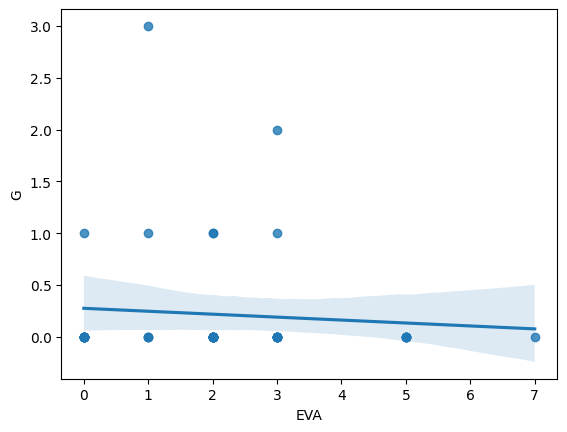

In [68]:
sns.regplot(data = data, x = data['EVA'],  y = data['G'])

In [69]:
stat, p = stats.spearmanr(data['EVA'], data['G'])

print('Spearman:')
print(f'Statistic : {stat:.4f}, p-value : {p:3f}')

Spearman:
Statistic : -0.0563, p-value : 0.710185


In [70]:
print('Hipótesis 8:')
if p < 0.05:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')



Hipótesis 8:
No se rechaza la hipotesis nula


#### **9. ¿Los valores EVA son mayores cuanto mayor es el volumen de contraste utilizado?**

Volumen contraste: Cuantitativa continua

EVA: Cuantitativa discreta

Test de correlacion: Spearman

- H0: No hay correlació entre cantidad de contraste y el dolor referido por la paciente
- H1: Existe correlación entre cantidad de contraste y el dolor referido por la paciente.

<AxesSubplot:xlabel='EVA', ylabel='Volumen contraste'>

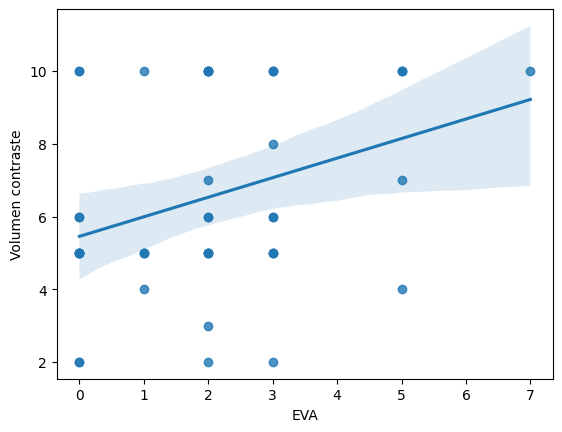

In [71]:
sns.regplot(data = data, x = data['EVA'],  y = data['Volumen contraste'])

In [79]:
stat, p = stats.spearmanr(data['EVA'], data['Volumen contraste'])

print('Spearman:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')

Spearman:
Statistic : 0.3030, p-value :   0.040638


In [80]:
print('Hipótesis 9:')
if p < 0.05:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')

Hipótesis 9:
Se rechaza la hipotesis nula


**EVA categorizado en 3 grupos: Leve, moderado y severo**

- Leve: 0 a 2
- Moderado: 3 a 6
- Severo: 7 a 10

Prueba estadistica entre una variable categorica (EVA) y una variable continua discreta.

Prueba de Kruskal-Wallis

In [74]:
limite_leve = 4
limite_moderado = 7
limite_severo = 10

labels = ['Leve', 'Moderado', 'Severo']

data['Categoría_EVA'] = pd.cut(data['EVA'], bins=[0, limite_leve, limite_moderado, limite_severo], labels=labels)


In [75]:
leve = data.loc[data['Categoría_EVA'] == 'Leve']['Volumen contraste']
moderado = data.loc[data['Categoría_EVA'] == 'Moderado']['Volumen contraste']
severo = data.loc[data['Categoría_EVA'] == 'Severo']['Volumen contraste']

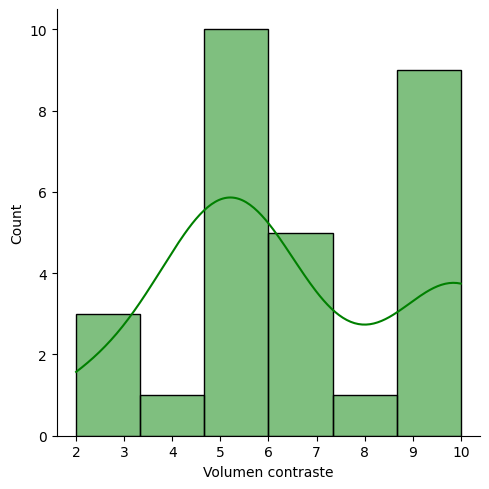

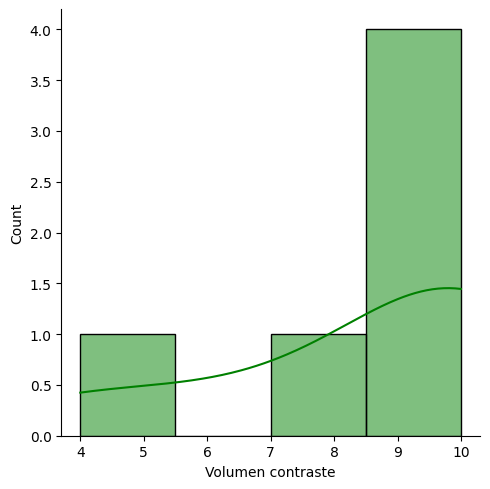

In [76]:
sns.displot(leve, kde = True, color = 'green')
sns.displot(moderado, kde = True, color = 'green')

In [77]:
stat, p = stats.kruskal(leve, moderado)

print('Kruskal:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')

Kruskal:
Statistic : 2.2576, p-value :   0.132962


In [78]:
print('Hipotesis 9.b')
if p < 0.05:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')


Hipotesis 9.b
No se rechaza la hipotesis nula
